<a href="https://colab.research.google.com/github/faaizali124/DEP/blob/main/Task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
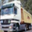

In [8]:
X_train[1]

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
classes[9]

'truck'

In [11]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

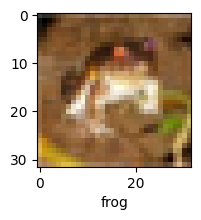

In [12]:
plot_sample(X_train, Y_train, 0)

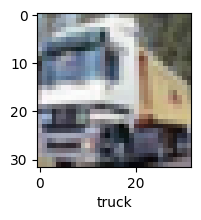

In [13]:
plot_sample(X_train, Y_train, 1)

In [14]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.3439 - loss: 1.7801
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.5758 - loss: 1.1943
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6451 - loss: 1.0146
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6862 - loss: 0.9018
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7207 - loss: 0.8093
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7456 - loss: 0.7297
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7607 - loss: 0.6918
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7806 - loss: 0.6372
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7978 - loss: 0.5795
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.8028 - loss: 0.5621


In [18]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [19]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

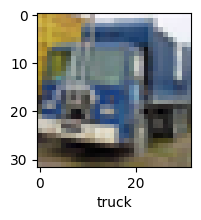

In [20]:
plot_sample(X_test, Y_test, 14)

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step


array([[2.45062844e-03, 2.18242945e-04, 1.62858132e-03, 8.13303947e-01,
        4.80221730e-04, 1.13640010e-01, 8.54419824e-03, 5.38012129e-04,
        5.89775443e-02, 2.18649177e-04],
       [1.56933907e-02, 1.24260105e-01, 1.98602283e-05, 4.79217742e-05,
        1.79664050e-06, 3.86360898e-06, 3.06890229e-06, 1.32240427e-06,
        8.56003344e-01, 3.96539224e-03],
       [9.78961810e-02, 2.99424499e-01, 1.55869080e-03, 4.44678264e-03,
        5.01156924e-03, 2.83539575e-03, 1.92387743e-04, 2.12274655e-03,
        5.04491150e-01, 8.20206776e-02],
       [8.34531784e-01, 2.10024766e-03, 1.25322500e-02, 1.05811488e-02,
        3.25567066e-03, 2.50945275e-04, 8.31244455e-04, 2.16598375e-04,
        1.31233141e-01, 4.46679862e-03],
       [2.00103000e-06, 2.20641341e-05, 1.18547445e-02, 1.80516224e-02,
        7.89964199e-02, 1.93753571e-03, 8.89069438e-01, 5.73133620e-05,
        8.19666002e-06, 5.75674790e-07]], dtype=float32)

In [22]:
np.argmax(y_pred[1])

8

In [23]:
y_class = [np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 0, 6]

In [24]:
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7062 - loss: 0.9078


[0.896072268486023, 0.7081999778747559]

In [25]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)